In [1]:
# %matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from census import Census
import requests

# Access cleaned housing data (using Power Query in Excel)

metro_hv_df = pd.read_csv("Data/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month_modified.csv")
metro_inventory_df = pd.read_csv("Data/Metro_invt_fs_uc_sfr_sm_month_modified.csv")
zipcode_hv_df = pd.read_csv("Data/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month_modified.csv")
census_df = pd.read_csv("Data/Census/all_census_data_zipcode.csv")

# Merge house value file with census file
hv_census_df = pd.merge(zipcode_hv_df, census_df, how='outer', on='Zipcode_Year')

# Drop zipcodes that don't have exist in one of the files
hv_census_df = hv_census_df.dropna()

# Adding affordability column (how many years of household income would it take to buy a house at the average house price)
hv_census_df["Affordability"] = hv_census_df["Average House Price"] / hv_census_df["Household Income"]

hv_census_df = hv_census_df.drop(columns=['Zipcode_y', 'Year_y'])
hv_census_df = hv_census_df.rename(columns={"Zipcode_x": "Zipcode", "Year_x": "Year"})
hv_census_df["Zipcode"] = hv_census_df["Zipcode"].astype(int)
hv_census_df["Year"] = hv_census_df["Year"].astype(int)
hv_census_df["Population"] = hv_census_df["Population"].astype(int)
hv_census_df["Household Income"] = hv_census_df["Household Income"].astype(int)
hv_census_df["Per Capita Income"] = hv_census_df["Per Capita Income"].astype(int)
hv_census_df["Poverty Count"] = hv_census_df["Poverty Count"].astype(int)
hv_census_df["Average House Price"] = hv_census_df["Average House Price"].round(2)
hv_census_df["Affordability"] = hv_census_df["Affordability"].round(2)

In [2]:
metro_hv_df

,Year,Average House Price
0,2013,150641.2500
1,2014,169061.1667
2,2015,179508.3333
3,2016,191574.5000
4,2017,205885.2500
5,2018,224960.7500
6,2019,239677.0833
7,2020,254027.1667
8,2021,281973.3333


In [8]:
metro_inventory_df.head()

,Month,Inventory Volume,Month Year,Month.1,Year,YearMonth
0,1/31/2018,27491,Jan 2018,1,2018,201801
1,2/28/2018,26389,Feb 2018,2,2018,201802
2,3/31/2018,27430,Mar 2018,3,2018,201803
3,4/30/2018,28736,Apr 2018,4,2018,201804
4,5/31/2018,30231,May 2018,5,2018,201805


In [9]:
# zipcode_hv_df

In [5]:
# # Drop everything except monthly numbers
# # del metro_inventory_df.iloc[0:4]
# # del metro_inventory_df['SizeRank']
# just_dates = metro_inventory_df.drop(metro_inventory_df.iloc[:,0:5], inplace = False, axis =1)
# just_dates

In [6]:
# # Months list
# date = just_dates.iloc[0,0:42].index.values
# date
# listings = just_dates.iloc[0,0:42].values

# months2 = []

# for x in date:
#     my_date = datetime.strptime(x, "%m/%d/%Y")
#     my_date = my_date.strftime("%b") +" "+ str(my_date.year)
#     months2.append(my_date)
# months2

In [17]:
# new = old.filter(['A','B','D'], axis=1)
inv_by_mo_df = metro_inventory_df.filter(['Inventory Volume','Month Year'])
inv_by_mo_df.head()

,Inventory Volume,Month Year
0,27491,Jan 2018
1,26389,Feb 2018
2,27430,Mar 2018
3,28736,Apr 2018
4,30231,May 2018


In [10]:
# df = pd.DataFrame({"Month":months2,"Listings":listings})
# df

<AxesSubplot:xlabel='Month Year'>

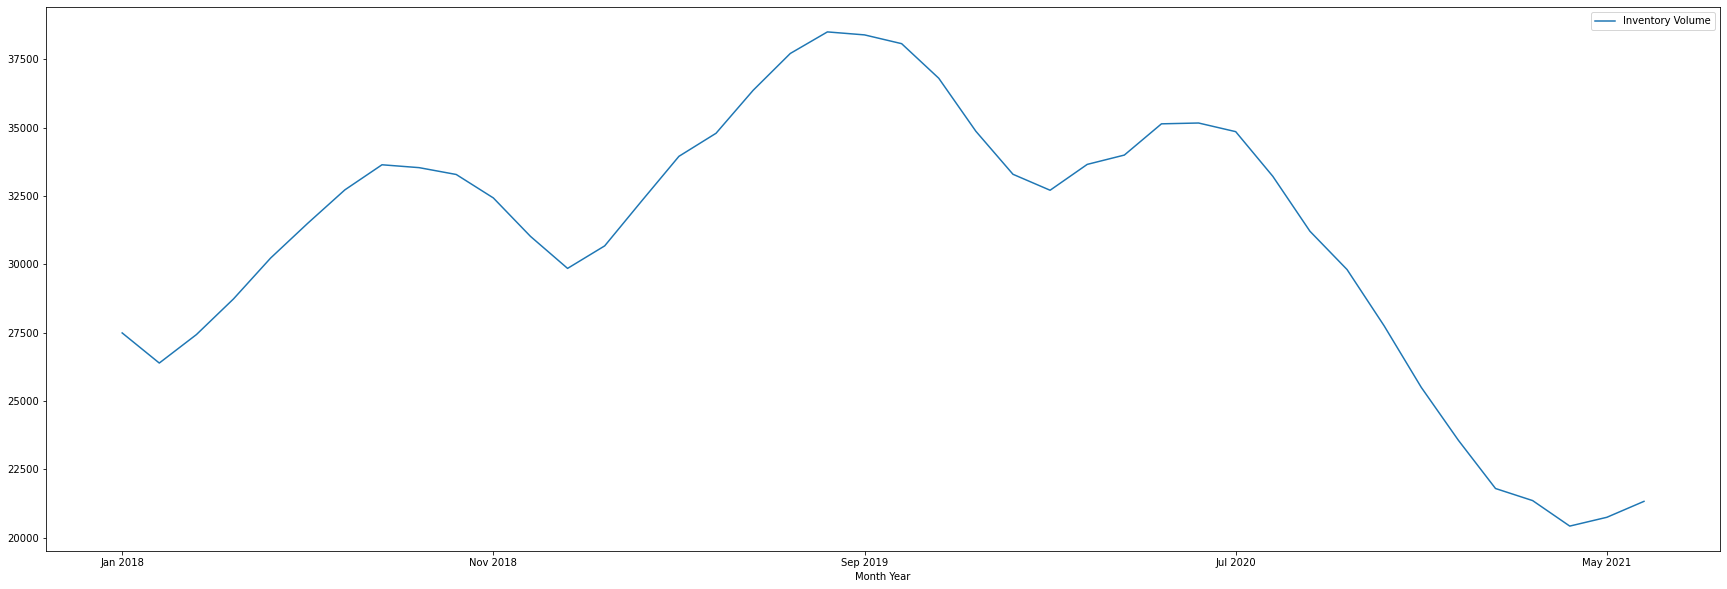

In [18]:
ax = inv_by_mo_df.plot(x='Month Year',y='Inventory Volume',figsize=(30,10))
ax

In [ ]:
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

In [ ]:
# # Line chart for Home inventory by month

# # listings.values

# fig, ax = plt.subplots()
# pd.plot(months2, listings, figsize = (30,10))

# # Plot it
# # mo_avg_listings = plt.plot(months2, listings, color="blue", label="World Average")
# plt.xticks(rotation=90)

# # # mo_avg_listings = plt.plot(metro_inventory_df, color="blue", label="World Average" )
# # # plt.savefig("image.png")
# # # fig = plt.figure()
# # # fig.set_size_inches(8, 16)
# # # plt.show()
# # plt.gcf().subplots_adjust(bottom=0.25)

# # fig = plt.figure(figsize=(10,50))
# # ax = fig.add_subplot(111)
# # ax.plot(months2)
# # ax.set_yticks(listings)
# # labels = ax.set_yticklabels(listings)
# fig.subplots_adjust(bottom=spacing)
# plt.show()


In [ ]:
# # months = []
# # years = []
# labels = []
# month_mapper = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6:'June', 7:'July', 8:'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# for x in date:
#     month = x.split(sep="/")[0]
#     year = x.split(sep="/")[2]
    
# #     years.append(x.split(sep="/")[2])
# #     months.append(x.split(sep="/")[0])
#     labels.append(str(month) + " - " + str(year))
    
# labels

In [ ]:
listings.index.values

In [ ]:
listings